There are 8000 total patients
Distribution is Gender
Male      5206
Female    2794
Name: count, dtype: int64
Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64
Diseases that are common among gender: Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441
  Admission Date Discharge Date  Stay Duration
0     2022-12-19     2023-01-16             28
1     2023-03-29     2023-04-21             23
2     2022-09-16     2022-10-15             29
3     2022-02-07     2022-02-11              4
4     2022-10

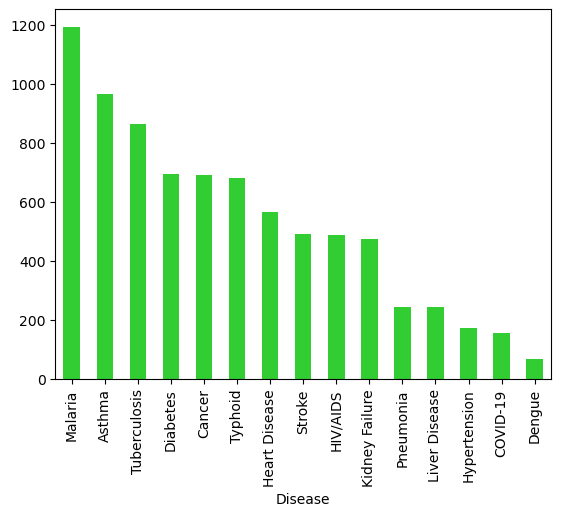

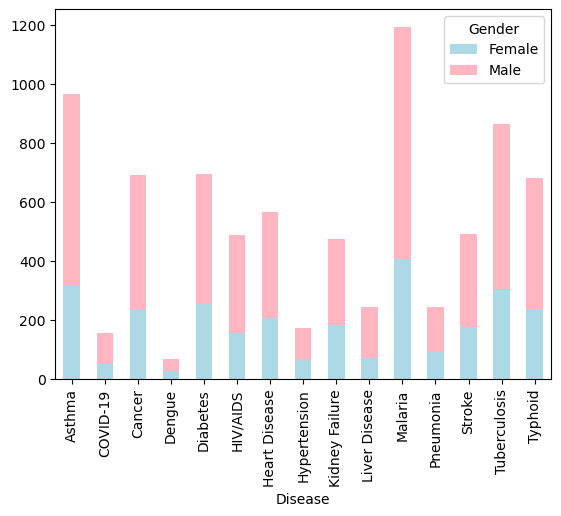

In [ ]:
#import file
import pandas as pd
df = pd.read_csv("/Users/terahawes/Desktop/Health_dataset.csv")
                
#print first few rows to confirm uploaded right
#df.head(20) 

#1. count number of patients 
total_records = df.shape[0]

print("There are", total_records, "total patients")

#2. How is the population distributed by gender?
gender_count = df['Gender'].value_counts()
print("Distribution is", gender_count)

#3. Patient's age-group by total visit 
#convert admission date and DOB to date format 
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

#Calc patient age as time of admission
df['Age'] = (df['Admission Date'] - df['Date of Birth']).dt.days / 365.25 #convert to year
df['Age'] = df['Age'].astype(int) #convert float to int

#Define age bins
bins = [0,20,40,60,80,100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

#Create an age group using the bins var defined 
df['Age Group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False)

#Count amt of patients in each bin
age_count = df['Age Group'].value_counts()

print(age_count)

#4. Which diseases are most commonly diagnosed among the patients? 
disease_counts = df['Disease'].value_counts()
ax = disease_counts.plot(kind='bar', color = 'limegreen') 

#5. Diseases that are most prevalent by gender
gender_disease = pd.crosstab(df['Disease'], df['Gender'])
print("Diseases that are common among gender:", gender_disease)

#Visual 
ax = gender_disease.plot(kind='bar', color=['lightblue', 'lightpink'], stacked = True)


#6. Average length of stay 
#convert date into date data type 
df['Admission Date'] = pd.to_datetime(df['Admission Date'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Stay Duration'] = (df['Discharge Date'] - df['Admission Date']).dt.days
df['Stay Duration'] = df['Stay Duration'].astype(int) #convert float to int

print(df[['Admission Date', 'Discharge Date', 'Stay Duration']].head(10))

# group stay duration 
bins = [-1,0,3,7,14, float('inf')]
labels = ["Same Day", "1-3 Days", "4-7 Days", "8-14 Days", "Above 21 Days"]
df['Stay Bins'] = pd.cut(df['Stay Duration'], bins=bins, labels = labels, right = True)

print(df['Stay Bins'])

#Patients in each group 
duration_count = df['Stay Bins'].value_counts()
print(duration_count)







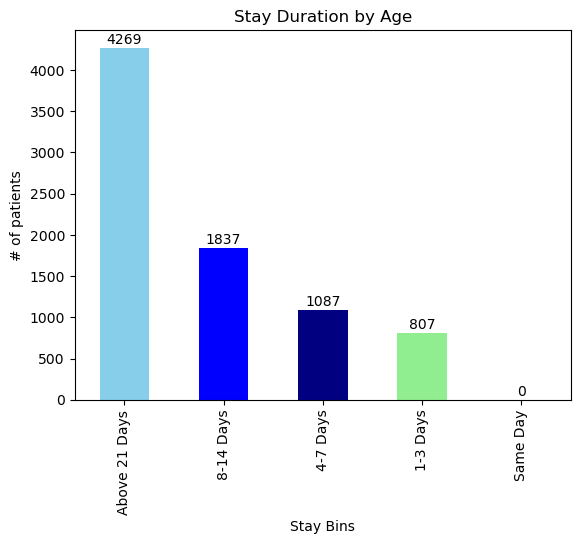

In [30]:
#Visualize stay duration
import matplotlib.pyplot as plt 
plt.title("Stay Duration by Age")
plt.ylabel("# of patients")

ax = duration_count.plot(kind = 'bar', color = ['skyblue', 'blue', 'navy', 'lightgreen', 'green'])

#Label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}', 
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,1),
        textcoords = "offset points",
        ha='center', 
        va='bottom'
    )

In [31]:
#calculate top 3 percentages of GRAND TOTAL

disease_count = df['Disease'].value_counts().nlargest(3) #returns top three diseases
total_disease_count = df['Disease'].value_counts().sum()

percentage = (disease_count / total_disease_count) * 100
roundpercentage = percentage.round(0).astype(int)
for disease, pct in roundpercentage.items():
    print(f"{disease} : {pct} %")

Malaria : 15 %
Asthma : 12 %
Tuberculosis : 11 %


In [32]:
disease_count = df['Disease'].value_counts().nlargest(3) #returns top three diseases
total_top3 = disease_count.sum()
format_value = "{:,}".format(total_top3) #proper syntax, comma
print("Sum of the three most frequent diseases:", format_value)

Sum of the three most frequent diseases: 3,023


In [33]:
#create dynamic top values
#dynamictop = 6
#disease_count = df['Disease'].value_counts().nlargest(dynamictop) 
#total_top = disease_count.sum()
#format_value = "{:,}".format(total_top) #proper syntax, comma
#description = f"Total count of the {dynamictop} most common diseases:"
#print(description, format_value)

for dynamictop in range(1,11):
    disease_count = df['Disease'].value_counts().nlargest(dynamictop) 
    total_top = disease_count.sum()
    format_value = "{:,}".format(total_top) #proper syntax, comma
    description = f"Total count of the {dynamictop} most common diseases:"
    print(description, format_value)

Total count of the 1 most common diseases: 1,193
Total count of the 2 most common diseases: 2,159
Total count of the 3 most common diseases: 3,023
Total count of the 4 most common diseases: 3,717
Total count of the 5 most common diseases: 4,408
Total count of the 6 most common diseases: 5,088
Total count of the 7 most common diseases: 5,655
Total count of the 8 most common diseases: 6,148
Total count of the 9 most common diseases: 6,636
Total count of the 10 most common diseases: 7,111


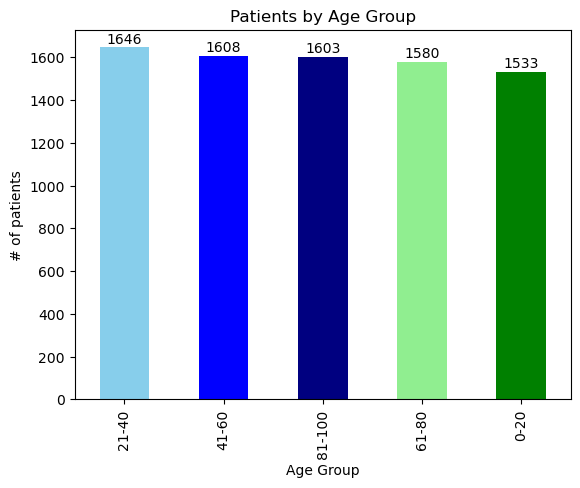

In [34]:
#Visualize age groups
import matplotlib.pyplot as plt 
plt.title("Patients by Age Group")
plt.ylabel("# of patients")

ax = age_count.plot(kind = 'bar', color = ['skyblue', 'blue', 'navy', 'lightgreen', 'green'])

#Label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}', 
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,1),
        textcoords = "offset points",
        ha='center', 
        va='bottom'
    )

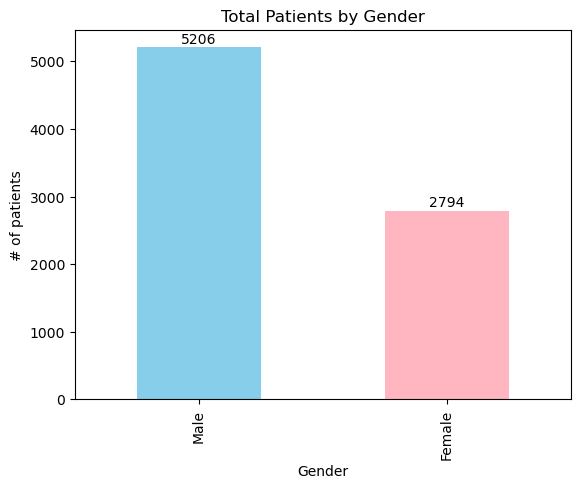

In [35]:
#Visualize gender distribution: 
#Adding data label 
import matplotlib.pyplot as plt 
ax = gender_count.plot(kind='bar',color = ['skyblue', 'lightpink'])

plt.title("Total Patients by Gender")
plt.ylabel("# of patients")

#Label part
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{int(height)}', 
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext = (0,1),
        textcoords = "offset points",
        ha='center', 
        va='bottom'
    )

plt.show()